In [1]:
#%pip install -U scikit-learn
# Carga Bibliotecas e Dados
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

def idade_media(df_train: pd.DataFrame, df_test: pd.DataFrame):
    _df_test = pd.DataFrame.copy(df_test)
    _df_train = pd.DataFrame.copy(df_train)

    _df_test['Survived'] = 0

    df = pd.concat([_df_train, _df_test], ignore_index=True)
    df.dropna(subset=['Age'], how='all', inplace=True)
    return df.groupby('Saudacao')['Age'].mean()

def set_idade_media_if_null(row: pd.Series, media):
    result = row['Age']
    if ( np.isnan(row['Age']) ):
        result = media[row['Saudacao']]
    return result

def tipoIdade(x):
    if x < 18:
        return 'Crianca'
    elif x >= 18 and x < 50:
        return 'Adulto'
    else:
        return 'Idoso'



In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train['Age'].isna().sum())
print(train.shape[0])

print(test['Age'].isna().sum())
print(test.shape[0])

print(train['Sex'].isnull().sum())
print(train.shape[0])

print(test['Sex'].isnull().sum())
print(test.shape[0])

177
891
86
418
0
891
0
418


In [4]:
train['Cabin'] = train['Cabin'].str[0:1]
train['Cabin'].fillna('C', inplace=True)
test['Cabin'] = test['Cabin'].str[0:1]
test['Cabin'].fillna('C', inplace=True)

train['Tam_Familia'] = train['SibSp'] + train['Parch']
test['Tam_Familia'] = test['SibSp'] + test['Parch']

train['Saudacao'] = train['Name'].str.extract("([A-Za-z]+)\.")
test['Saudacao'] = test['Name'].str.extract("([A-Za-z]+)\.")

_idade_media = idade_media(train, test)
train['Age'] = train.apply(set_idade_media_if_null, axis=1, media=_idade_media)
test['Age'] = test.apply(set_idade_media_if_null, axis=1, media=_idade_media)

#print('Train Age Count: ', train['Age'].isna().sum())
#print('Test Age Count: ', test['Age'].isna().sum())

# Reduzindo possibilidades para padronizar modelo, pois em teste não há todos os tipos existentes e treino
#train['Saudacao']\
#  .replace(['Mlle',     'Mme',      'Ms',       'Dr',    'Major', 'Lady',   'Countess','Jonkheer','Col',  'Rev',  'Capt',  'Sir',   'Don'],
#           ['Senhorita','Senhorita','Senhorita','Senhor','Senhor','Senhora','Senhora', 'Outro',   'Outro','Outro','Senhor','Senhor','Senhor'], inplace=True)
#test['Saudacao']\
#  .replace(['Dona',     'Mlle',     'Mme',      'Ms',       'Dr',    'Major', 'Lady',   'Countess','Jonkheer','Col',  'Rev',  'Capt',  'Sir',   'Don'],
#           ['Senhorita','Senhorita','Senhorita','Senhorita','Senhor','Senhor','Senhora','Senhora', 'Outro',   'Outro','Outro','Senhor','Senhor','Senhor'], inplace=True)

# Reduzindo possibilidades para padronizar modelo, pois em teste não há todos os tipos existentes e treino
train['Saudacao']\
  .replace(['Mlle','Mme', 'Ms',  'Dr','Major','Lady','Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don'],
           ['Miss','Miss','Miss','Mr','Mr',   'Mrs', 'Mrs',     'Other',   'Other','Other','Mr',  'Mr', 'Mr'], inplace=True)
test['Saudacao']\
  .replace(['Dona','Mlle','Mme', 'Ms',  'Dr','Major','Lady','Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don'],
           ['Miss','Miss','Miss','Miss','Mr','Mr',   'Mrs', 'Mrs',     'Other',   'Other','Other','Mr',  'Mr',  'Mr'], inplace=True)

# Classificando idade por Criança, Adulto, Idoso
train['t_idade'] = train['Age'].apply(lambda x: tipoIdade(x))
test['t_idade'] = test['Age'].apply(lambda x: tipoIdade(x))

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tam_Familia,Saudacao,t_idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,C,S,1,Mr,Adulto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,1,Mrs,Adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,C,S,0,Miss,Adulto
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,1,Mrs,Adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C,S,0,Mr,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,C,S,0,Other,Adulto
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,0,Miss,Adulto
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.774238,1,2,W./C. 6607,23.4500,C,S,3,Miss,Adulto
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,0,Mr,Adulto


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tam_Familia,Saudacao,t_idade
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,C,Q,0,Mr,Adulto
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,C,S,1,Mrs,Adulto
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,C,Q,0,Mr,Idoso
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,C,S,0,Mr,Adulto
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,C,S,2,Mrs,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,C,S,0,Mr,Adulto
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,C,0,Miss,Adulto
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,C,S,0,Mr,Adulto
416,1308,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,C,S,0,Mr,Adulto


<Axes: >

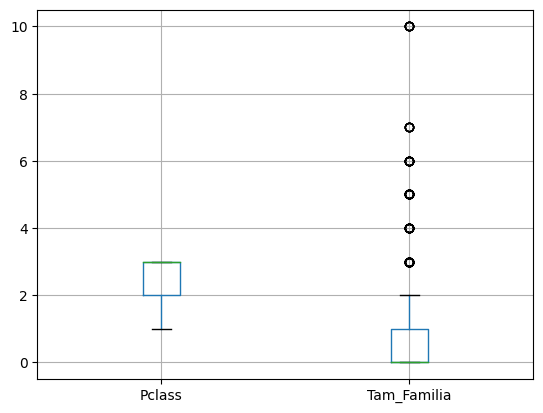

In [7]:
train.boxplot(column=['Pclass', 'Tam_Familia'])


In [8]:
test.boxplot(column=['Pclass', 'Tam_Familia'])

<Axes: >

In [9]:
train_embarked_dummies = pd.get_dummies(train.loc[:,['Embarked']])
train_sex_dummies = pd.get_dummies(train.loc[:,['Sex']])
train_saudacao_dummies = pd.get_dummies(train.loc[:,['Saudacao']])
train_t_idade = pd.get_dummies(train.loc[:,['t_idade']])
train_cabin = pd.get_dummies(train.loc[:,['Cabin']])

test_embarked_dummies = pd.get_dummies(test.loc[:,['Embarked']])
test_sex_dummies = pd.get_dummies(test.loc[:,['Sex']])
test_saudacao_dummies = pd.get_dummies(test.loc[:,['Saudacao']])
test_t_idade = pd.get_dummies(test.loc[:,['t_idade']])
test_cabin = pd.get_dummies(test.loc[:,['Cabin']])

In [10]:
X = pd.concat([train.loc[:,['Pclass', 'Tam_Familia']], \
                      train_saudacao_dummies, \
                      train_embarked_dummies,\
                      train_sex_dummies,\
                      train_t_idade,\
                      #train_cabin
                        ], axis=1)

X

,Pclass,Tam_Familia,Saudacao_Master,Saudacao_Miss,Saudacao_Mr,Saudacao_Mrs,Saudacao_Other,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,t_idade_Adulto,t_idade_Crianca,t_idade_Idoso
0,3,1,False,False,True,False,False,False,False,True,False,True,True,False,False
1,1,1,False,False,False,True,False,True,False,False,True,False,True,False,False
2,3,0,False,True,False,False,False,False,False,True,True,False,True,False,False
3,1,1,False,False,False,True,False,False,False,True,True,False,True,False,False
4,3,0,False,False,True,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,False,False,False,False,True,False,False,True,False,True,True,False,False
887,1,0,False,True,False,False,False,False,False,True,True,False,True,False,False
888,3,3,False,True,False,False,False,False,False,True,True,False,True,False,False
889,1,0,False,False,True,False,False,True,False,False,False,True,True,False,False


In [11]:
# DICA DE PYTHON (muitos perguntam): Se você desejar UNIR dois dataframes utilize o comando=> X = pd.concat([X, X], axis=1) <= no exemplo "dentro" dos sinais > e <, o dataframe X é "duplicado" lado a lado. Faça o teste
mod = LinearRegression()

 # X = Features / Y = Label
Y = train.loc[:,['Survived']]
mod.fit(X ,Y)

print(mod.coef_)
print(mod.intercept_)
print(mod.rank_)
print(mod.n_features_in_)

from sklearn import metrics as M

#Finalizar o modelo
final_lr_model = finalize_model(tunne_lr)
Survived_Predict = [1 if  i > 0.6 else 0 for i in p['prediction_label']]
print(M.accuracy_score(p['Survived'], Survived_Predict))

[[-0.16469379 -0.05814655  0.47362283 -0.13647501 -0.08279681 -0.04609484
  -0.20825617  0.00590001 -0.0163985  -0.06239175  0.29675881 -0.29675881
   0.00917637  0.08945454 -0.09863091]]
[1.00394717]
12
15


In [12]:
X_test = pd.concat([test.loc[:,['Pclass', 'Tam_Familia']], \
                      test_saudacao_dummies, \
                      test_embarked_dummies,\
                      test_sex_dummies,\
                      test_t_idade,\
                      #test_cabin
                        ], axis=1)

#X_test['Cabin_T'] = False
X_test

p = mod.predict(X_test)

In [13]:
# As linhas abaixo só montam o arquivo de saída que será utilizado no Kaggle, com destaque para
# como o resultado da variável p é um número entre 0 e 1, convertemos ele para 0 se for menor que 0.5 e para 1 se maior
Survived_Predict = [1 if  i > 0.6 else 0 for i in p]
df_pred = test.loc[:,['PassengerId']]
df_pred['Survived'] = Survived_Predict

In [14]:
df_pred.to_csv('predict.csv', index=False) 